# Project: Titanic Survival Analysis
### Goal:
    - Analyze Titanic passanger data to understand survival patterns using data analysis and visualizations.

### Libraries We Will Use
| Library      | Purpose                            |
| ------------ | ---------------------------------- |
| `pandas`     | Load and manipulate data           |
| `numpy`      | Handle numerical calculations      |
| `matplotlib` | Create basic plots and charts      |
| `seaborn`    | Create beautiful statistical plots |

### 🧰 Step-by-Step Plan
 1. Load the data (Titanic dataset)

 2. Explore the data (head, info, describe)

 3. Clean the data (handle missing values)

 4. Analyze data with Pandas and NumPy

 5. Visualize data with Matplotlib and Seaborn




### 🐍 Step 1: Setup and Load Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn (it's built-in!)
df = sns.load_dataset('titanic')

# Show first 5 rows
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [6]:
# Basic info about the dataset
print(df.info())
print()
# Statistical summary of numeric coloumns
print(df.describe())
print()
# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None

         survived      pclass         age       sibsp       parch        

### Step3: Data Cleaning

In [11]:
# Drop rows where 'age' is missing
df = df.dropna(subset=['age'])

# Fill missing 'embarked' values safely
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop the 'deck' column (too many missing values)
df = df.drop(columns=['deck'])

# Recheck missing values
print(df.isnull().sum())


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


### 📊 Step 4: Data Analysis
    - Let's answer some questions using Pandas + NumPy.


 1. How many survived vs died? 

In [15]:
survival_counts = df['survived'].value_counts()
print(survival_counts)

survived
0    424
1    290
Name: count, dtype: int64


 2. What was the average age of survivors vs non-survivors?

In [18]:
avg_age = df.groupby('survived')['age'].mean()
print(avg_age)

survived
0    30.626179
1    28.343690
Name: age, dtype: float64


✅ Explanation:
- value_counts() gives count of unique values.

- groupby('survived') groups passengers by survival (0 = died, 1 = survived) and calculates the mean age.



## 📈 Step 5: Visualization with Seaborn and Matplotlib
## 📌 Bar Plot: Survival Count

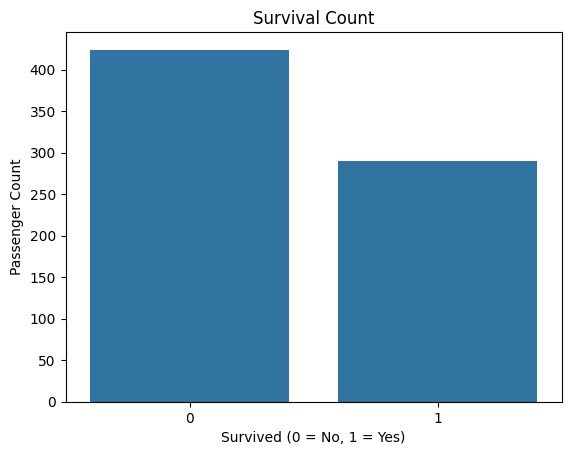

In [20]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Passenger Count')
plt.show()

### 📌 Box Plot: Age vs Class

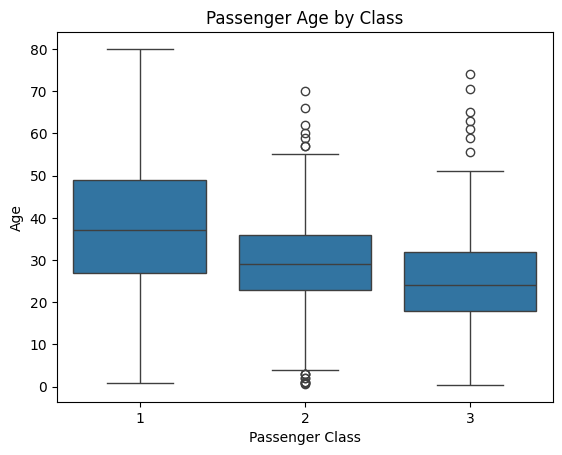

In [22]:
sns.boxplot(x='pclass', y='age', data=df)
plt.title('Passenger Age by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

### 📌 Histogram: Age Distribution

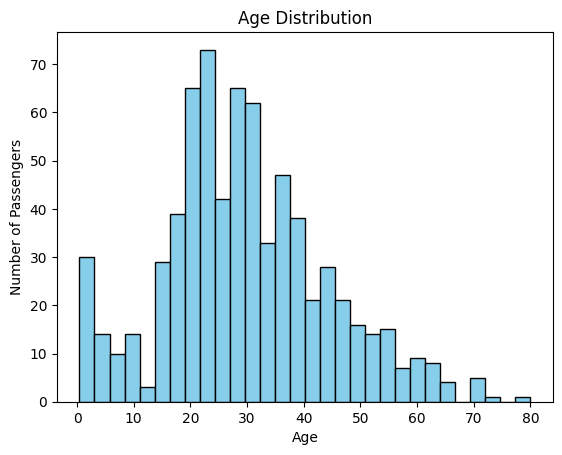

In [23]:
plt.hist(df['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()


In [ ]:
### 📌 Heatmap: Correlation Matrix

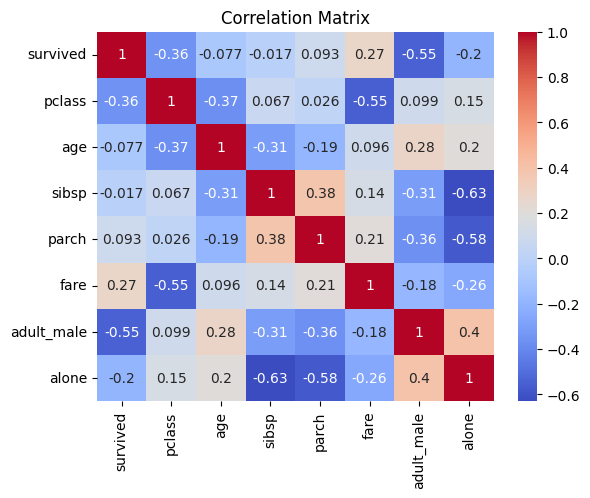

In [24]:
# Create correlation matrix
corr = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()